**Домашнее задание к уроку 4: Сверточные сети**\
**Цель задания**\
**Сравнить эффективность сверточных и полносвязных сетей на задачах компьютерного зрения, изучить преимущества CNN архитектур.**\
**Задание 1: Сравнение CNN и полносвязных сетей (40 баллов)**\
**1.1 Сравнение на MNIST (20 баллов)**

Обучение полносвязной сети


100%|██████████| 157/157 [00:02<00:00, 63.51it/s]


Epoch 1/5:
Train Loss: 0.2911, Train Acc: 0.9104
Test Loss: 0.1254, Test Acc: 0.9613
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 66.75it/s]


Epoch 2/5:
Train Loss: 0.1414, Train Acc: 0.9579
Test Loss: 0.0958, Test Acc: 0.9711
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 65.19it/s]


Epoch 3/5:
Train Loss: 0.1094, Train Acc: 0.9666
Test Loss: 0.0868, Test Acc: 0.9739
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 67.51it/s]


Epoch 4/5:
Train Loss: 0.0960, Train Acc: 0.9702
Test Loss: 0.0818, Test Acc: 0.9752
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 65.14it/s]


Epoch 5/5:
Train Loss: 0.0835, Train Acc: 0.9744
Test Loss: 0.0710, Test Acc: 0.9780
--------------------------------------------------


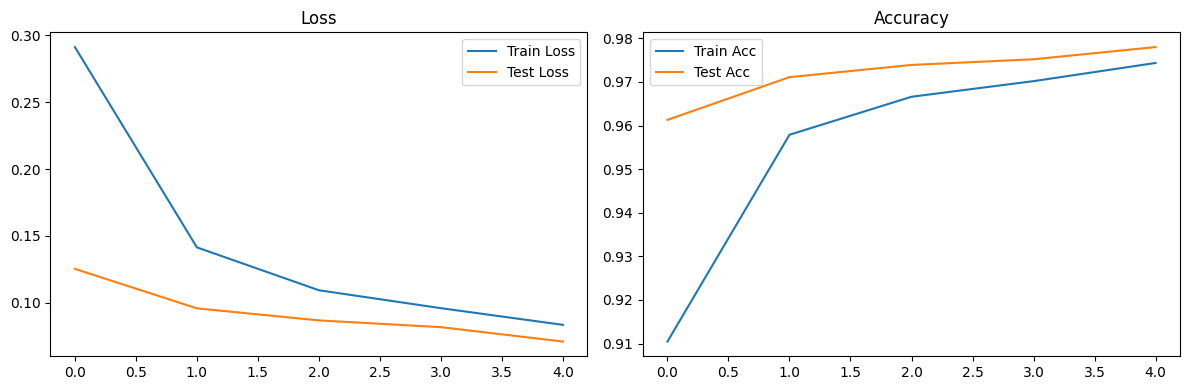

Обучение простой CNN


100%|██████████| 157/157 [00:02<00:00, 53.79it/s]


Epoch 1/5:
Train Loss: 0.1551, Train Acc: 0.9521
Test Loss: 0.0438, Test Acc: 0.9840
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 50.86it/s]


Epoch 2/5:
Train Loss: 0.0536, Train Acc: 0.9838
Test Loss: 0.0337, Test Acc: 0.9878
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 55.95it/s]


Epoch 3/5:
Train Loss: 0.0383, Train Acc: 0.9879
Test Loss: 0.0270, Test Acc: 0.9914
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 54.12it/s]


Epoch 4/5:
Train Loss: 0.0310, Train Acc: 0.9901
Test Loss: 0.0240, Test Acc: 0.9917
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 64.00it/s]


Epoch 5/5:
Train Loss: 0.0244, Train Acc: 0.9924
Test Loss: 0.0251, Test Acc: 0.9920
--------------------------------------------------


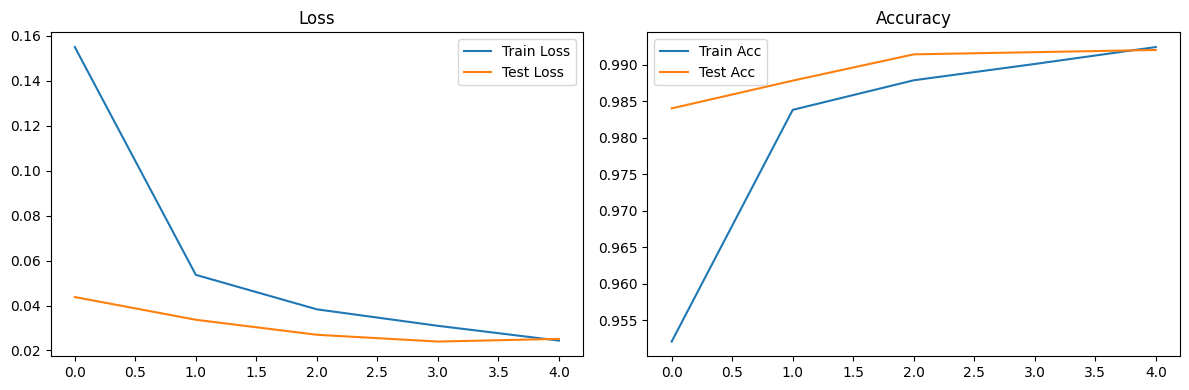

Обучение CNN с Residual Block


100%|██████████| 157/157 [00:02<00:00, 55.11it/s]


Epoch 1/5:
Train Loss: 0.1581, Train Acc: 0.9583
Test Loss: 0.0518, Test Acc: 0.9828
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 57.14it/s]


Epoch 2/5:
Train Loss: 0.0509, Train Acc: 0.9845
Test Loss: 0.0444, Test Acc: 0.9867
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 56.42it/s]


Epoch 3/5:
Train Loss: 0.0393, Train Acc: 0.9873
Test Loss: 0.0220, Test Acc: 0.9923
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 55.63it/s]


Epoch 4/5:
Train Loss: 0.0336, Train Acc: 0.9895
Test Loss: 0.0522, Test Acc: 0.9834
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 56.34it/s]


Epoch 5/5:
Train Loss: 0.0301, Train Acc: 0.9907
Test Loss: 0.0244, Test Acc: 0.9911
--------------------------------------------------


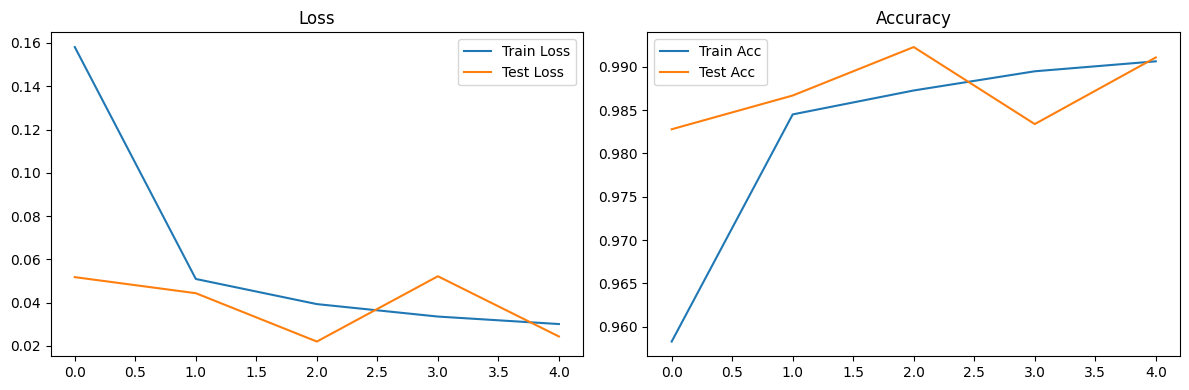

Полносвязная сеть
Время обучения - 98.052978515625 секунд
Время инференса - 2.2109603881835938 секунд
Количество параметров - 235146
Простая CNN
Время обучения - 104.65599870681763 секунд
Время инференса - 2.7875542640686035 секунд
Количество параметров - 421642
CNN с Residual Block
Время обучения - 134.1623785495758 секунд
Время инференса - 2.289773464202881 секунд
Количество параметров - 153226


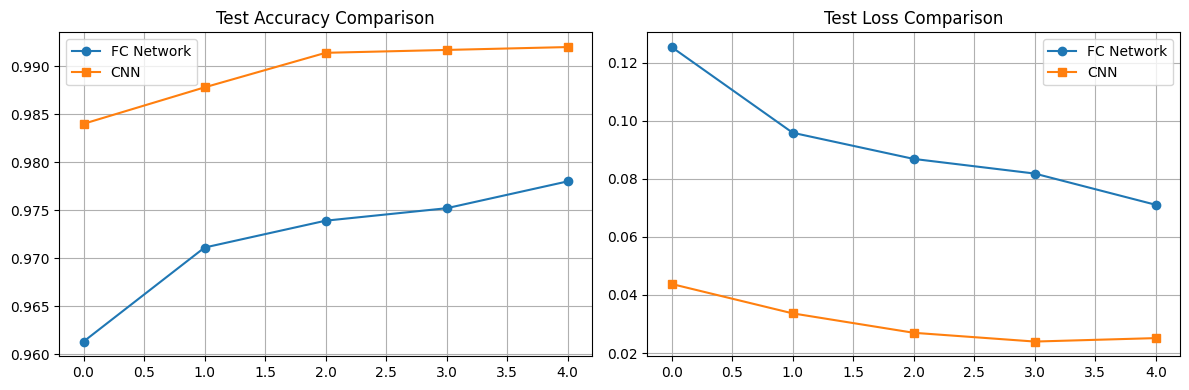

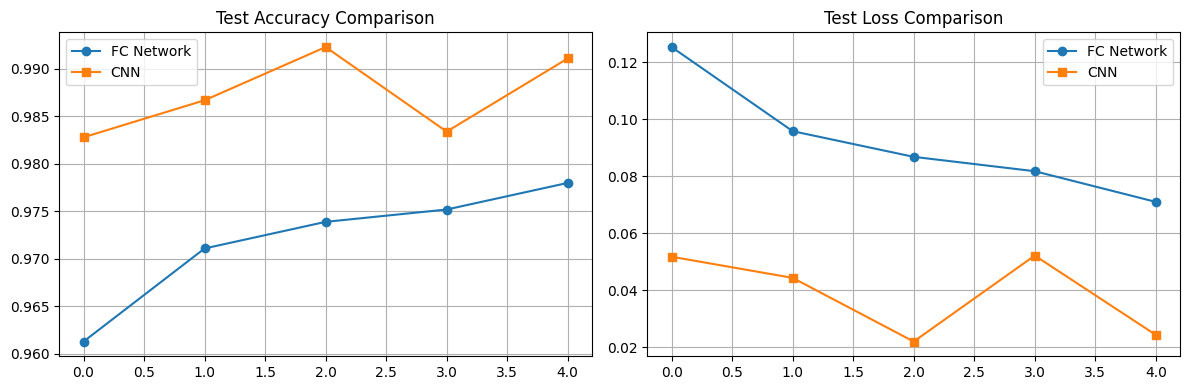

In [2]:
import torch
from datasets import get_mnist_loaders
from models import SimpleCNN, CNNWithResidual,FullyConnectedModel
from trainer import train_model
from utils import plot_training_history, count_parameters, compare_models
import time
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#одинавковые гиперпараметры для всех моеделей
batch_size = 64
epochs = 5
lr = 0.001
num_classes = 10

#конфиг для полносвязная сети
config = {
    "input_size": 28 * 28,
    "num_classes": num_classes,
    "layers": [
        {"type": "linear", "size": 256},
        {"type": "relu"},
        {"type": "dropout", "rate": 0.25},
        {"type": "linear", "size": 128},
        {"type": "relu"},
        {"type": "dropout", "rate": 0.25},
    ]
}


train_loader, test_loader = get_mnist_loaders(batch_size=batch_size)

print('Обучение полносвязной сети')
fc_res = []
fc_model = FullyConnectedModel(**config).to(device)
#замер времени обучения
start = time.time()
fc_history = train_model(fc_model, train_loader, test_loader, epochs=epochs, lr=lr, device=device)
end = time.time()
fc_res.append(end-start)
#замер времени инференса
start = time.time()
for data, labels in test_loader:
    i = fc_model(data.to(device))
end = time.time()
fc_res.append(end-start)
fc_res.append(count_parameters(fc_model))
#сохранение графика
plot_path = f"plots/fc_model_training.png"
plot_training_history(fc_history, save_path=plot_path)


print('Обучение простой CNN')
cnn_res = []
simple_cnn = SimpleCNN(input_channels=1, num_classes=num_classes).to(device)
#замер времени обучения
start = time.time()
cnn_history = train_model(simple_cnn, train_loader, test_loader, epochs=epochs, lr=lr, device=device)
end = time.time()
cnn_res.append(end-start)
#замер времени инференса
start = time.time()
for data, labels in test_loader:
    i = simple_cnn(data.to(device))
end = time.time()
cnn_res.append(end-start)
cnn_res.append(count_parameters(simple_cnn))
#сохранение графика
plot_path_cnn = f"plots/simple_cnn_training.png"
plot_training_history(cnn_history, save_path=plot_path_cnn)


print('Обучение CNN с Residual Block')
cnn_with_res_result = []
cnn_with_res = CNNWithResidual(input_channels=1, num_classes=num_classes).to(device)
#замер времени обучения
start = time.time()
cnn_with_res_history = train_model(cnn_with_res, train_loader, test_loader, epochs=epochs, lr=lr, device=device)
end = time.time()
cnn_with_res_result.append(end-start)
#замер времени инференса
start = time.time()
for data, labels in test_loader:
    i = cnn_with_res(data.to(device))
end = time.time()
cnn_with_res_result.append(end-start)
cnn_with_res_result.append(count_parameters(cnn_with_res))
#сохранение графика
plot_path_cnn_with_res = f"plots/cnn_with_res_training.png"
plot_training_history(cnn_with_res_history, save_path=plot_path_cnn_with_res)


#вывод времени, и колво параметров
print('Полносвязная сеть')
print(f"Время обучения - {fc_res[0]} секунд")
print(f"Время инференса - {fc_res[1]} секунд")
print(f"Количество параметров - {fc_res[2]}")

print('Простая CNN')
print(f"Время обучения - {cnn_res[0]} секунд")
print(f"Время инференса - {cnn_res[1]} секунд")
print(f"Количество параметров - {cnn_res[2]}")

print('CNN с Residual Block')
print(f"Время обучения - {cnn_with_res_result[0]} секунд")
print(f"Время инференса - {cnn_with_res_result[1]} секунд")
print(f"Количество параметров - {cnn_with_res_result[2]}")


#сохранение графиков сравнения
pth1 = f"plots/compare_fc_anc_simple_cnn.png"
compare_models(fc_history, cnn_history,pth1)
pth2 = f"plots/compare_fc_anc_cnn_with_res.png"
compare_models(fc_history, cnn_with_res_history,pth2)


**1.2 Сравнение на CIFAR-10 (20 баллов)**

100%|██████████| 170M/170M [00:18<00:00, 9.07MB/s] 


Обучение полносвязной сети для CIFAR


100%|██████████| 157/157 [00:02<00:00, 60.50it/s]


Epoch 1/5:
Train Loss: 1.8006, Train Acc: 0.3597
Test Loss: 1.6145, Test Acc: 0.4258
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 58.31it/s]


Epoch 2/5:
Train Loss: 1.6599, Train Acc: 0.4147
Test Loss: 1.5399, Test Acc: 0.4562
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 55.75it/s]


Epoch 3/5:
Train Loss: 1.5867, Train Acc: 0.4388
Test Loss: 1.4928, Test Acc: 0.4729
--------------------------------------------------


100%|██████████| 157/157 [00:02<00:00, 57.89it/s]


Epoch 4/5:
Train Loss: 1.5472, Train Acc: 0.4512
Test Loss: 1.4737, Test Acc: 0.4838
--------------------------------------------------


  0%|          | 0/782 [00:00<?, ?it/s]

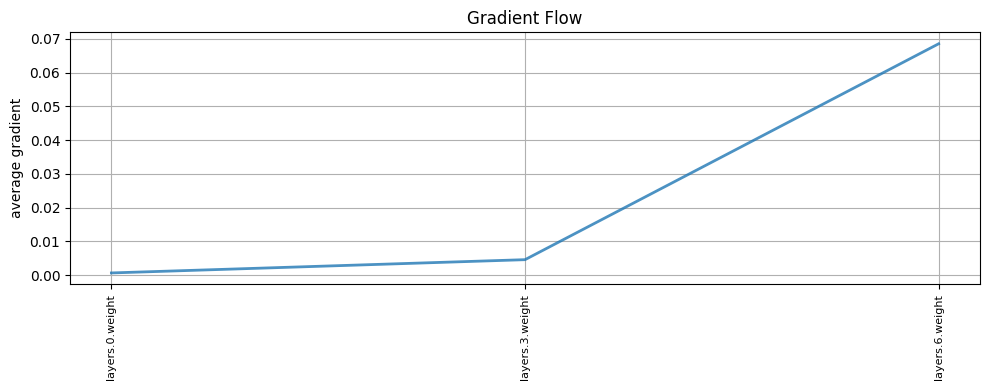

100%|██████████| 157/157 [00:02<00:00, 57.92it/s]


Epoch 5/5:
Train Loss: 1.5128, Train Acc: 0.4611
Test Loss: 1.4342, Test Acc: 0.4902
--------------------------------------------------


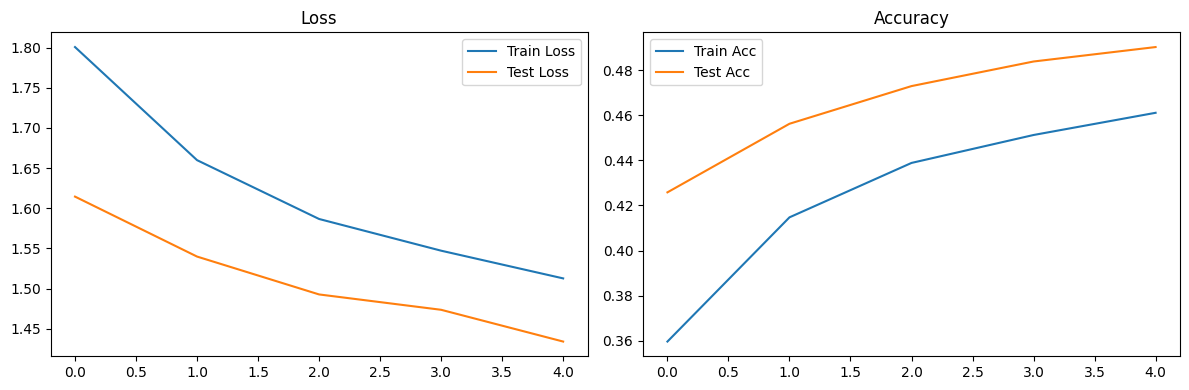


Confusion Matrix FC Model
Pred →      0       1       2       3       4       5       6       7       8       9
True   0    558     34     54     23     50     29     37     19    127     69
True   1     32    571     10     16     17     26     36     18     39    235
True   2     62     14    279     52    179    180    133     49     21     31
True   3     14     14     59    172     79    353    177     43     28     61
True   4     45      9    103     32    404     87    190     79     25     26
True   5     11     14     60    103     88    494    110     58     31     31
True   6      5     15     40     44     96     90    667     11      6     26
True   7     37     14     31     45     97    112     35    550     18     61
True   8    137     66     15     12     22     41     16      5    586    100
True   9     51    131      5     27     17     28     44     29     47    621
Обучение простой CNN для CIFAR


100%|██████████| 157/157 [00:03<00:00, 52.32it/s]


Epoch 1/5:
Train Loss: 1.7934, Train Acc: 0.3367
Test Loss: 1.5608, Test Acc: 0.4287
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 50.87it/s]


Epoch 2/5:
Train Loss: 1.5462, Train Acc: 0.4287
Test Loss: 1.4903, Test Acc: 0.4480
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 51.84it/s]


Epoch 3/5:
Train Loss: 1.4353, Train Acc: 0.4778
Test Loss: 1.3568, Test Acc: 0.5065
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 51.91it/s]


Epoch 4/5:
Train Loss: 1.3383, Train Acc: 0.5158
Test Loss: 1.3090, Test Acc: 0.5312
--------------------------------------------------


  0%|          | 0/782 [00:00<?, ?it/s]

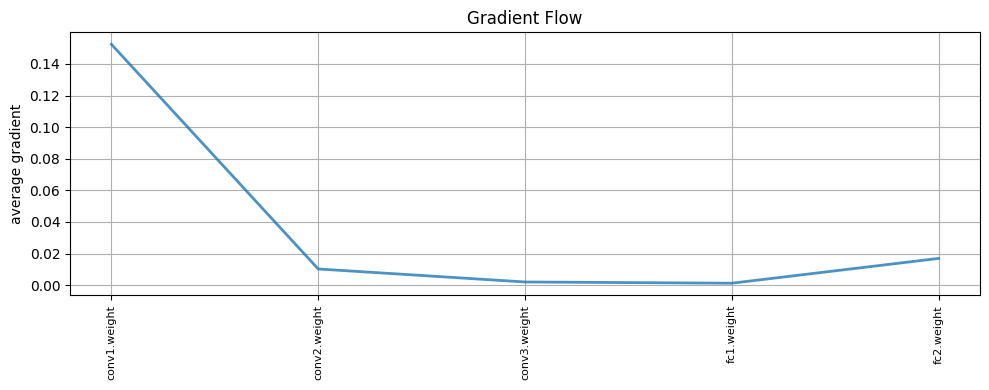

100%|██████████| 157/157 [00:03<00:00, 52.27it/s]


Epoch 5/5:
Train Loss: 1.2723, Train Acc: 0.5424
Test Loss: 1.2465, Test Acc: 0.5505
--------------------------------------------------


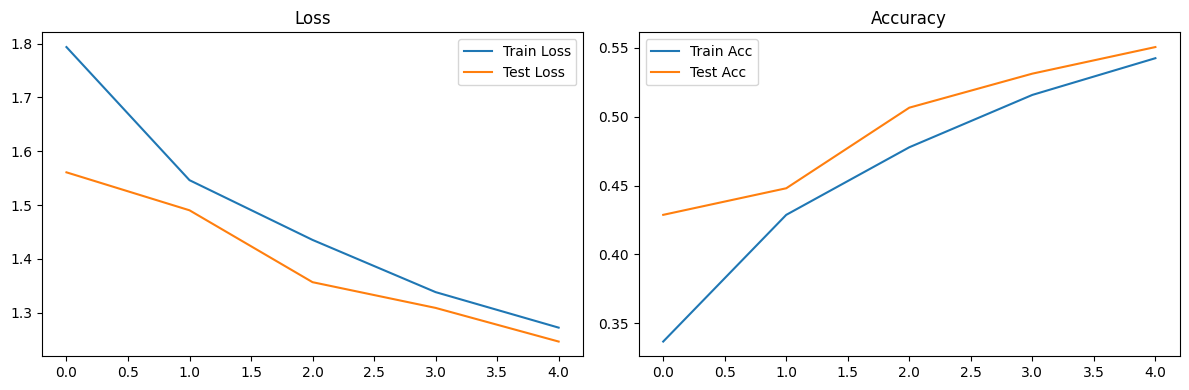


Confusion Matrix Simple CNN
Pred →      0       1       2       3       4       5       6       7       8       9
True   0    608     41     55     18     23     15     11     46    133     50
True   1     29    599      6     14      5     14     21     35     50    227
True   2     86     20    289     57    148    186     91     84     17     22
True   3     17     23     58    216     45    435     61    106     10     29
True   4     28     14     68     25    476    113     64    188     17      7
True   5      8      9     44    104     51    662     13     82     15     12
True   6     10     19     55     48    120     86    622     22      4     14
True   7     12     14     13     19     44    146     11    700      4     37
True   8    101    114     11      8     13     16      5     15    652     65
True   9     30    115      7     20      6     20     10     66     45    681
Обучение CNN с Residual Block для CIFAR


100%|██████████| 157/157 [00:03<00:00, 51.09it/s]


Epoch 1/5:
Train Loss: 1.3444, Train Acc: 0.5096
Test Loss: 1.0975, Test Acc: 0.6150
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 50.44it/s]


Epoch 2/5:
Train Loss: 0.9444, Train Acc: 0.6655
Test Loss: 0.9700, Test Acc: 0.6597
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 50.55it/s]


Epoch 3/5:
Train Loss: 0.8022, Train Acc: 0.7174
Test Loss: 0.7385, Test Acc: 0.7433
--------------------------------------------------


100%|██████████| 157/157 [00:03<00:00, 48.14it/s]


Epoch 4/5:
Train Loss: 0.7083, Train Acc: 0.7525
Test Loss: 0.6870, Test Acc: 0.7571
--------------------------------------------------


  0%|          | 0/782 [00:00<?, ?it/s]

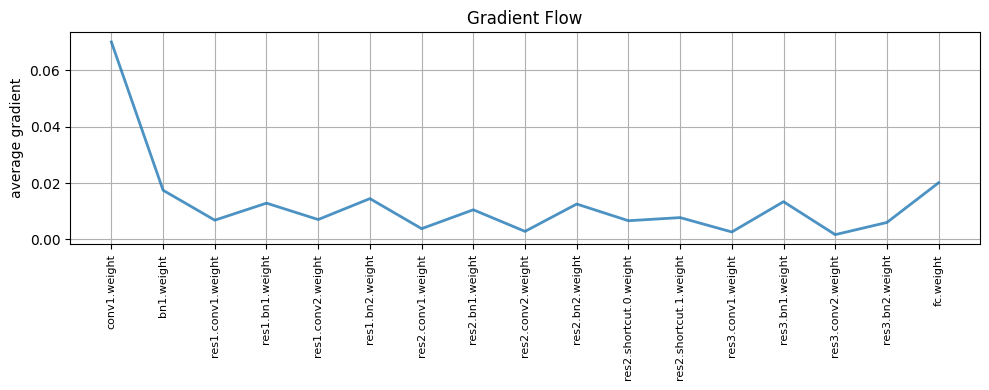

100%|██████████| 157/157 [00:03<00:00, 48.59it/s]


Epoch 5/5:
Train Loss: 0.6467, Train Acc: 0.7755
Test Loss: 0.6779, Test Acc: 0.7636
--------------------------------------------------


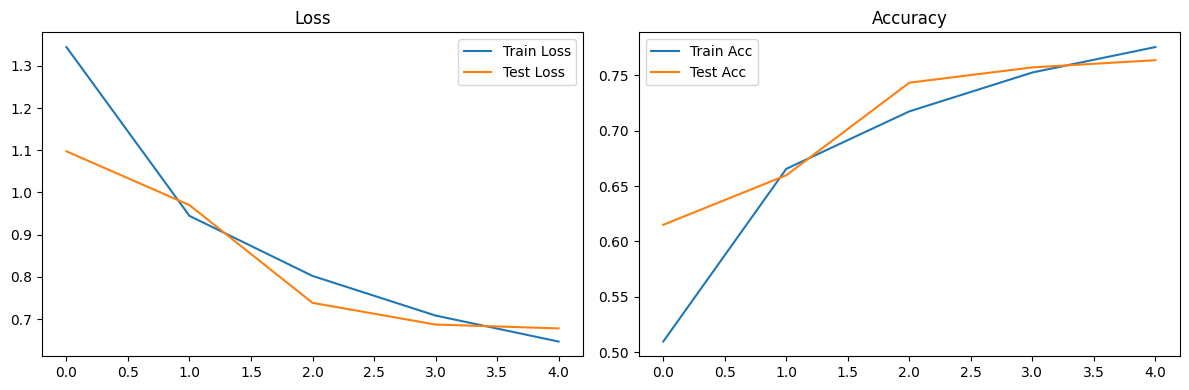


Confusion Matrix CNN with Residual
Pred →      0       1       2       3       4       5       6       7       8       9
True   0    852     13     27      3     12      0      1      7     67     18
True   1     10    940      2      2      1      0      2      0     18     25
True   2     95      9    704     23     94      7     32     18     15      3
True   3     38     13    118    616     75     20     32     35     40     13
True   4     23      5     62     31    821      2     12     29     15      0
True   5     18      6    148    275     69    391     12     67     10      4
True   6     15      8     93     39     47      2    772      6     14      4
True   7     28      2     55     23     75      3      1    799      7      7
True   8     40     12      2      4      2      0      1      4    923     12
True   9     37    102      2      3      0      0      1      4     33    818
Полносвязная сеть CIFAR
Время обучения - 92.55410099029541 секунд
Время инференса - 2.55

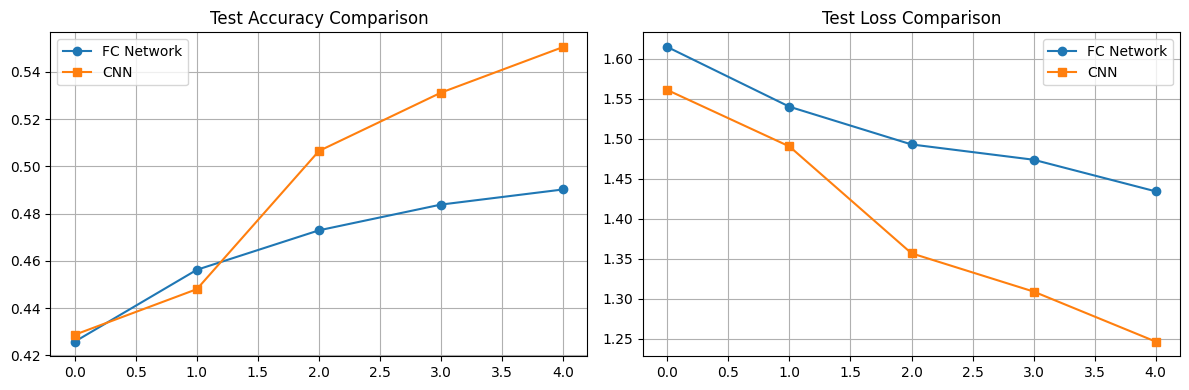

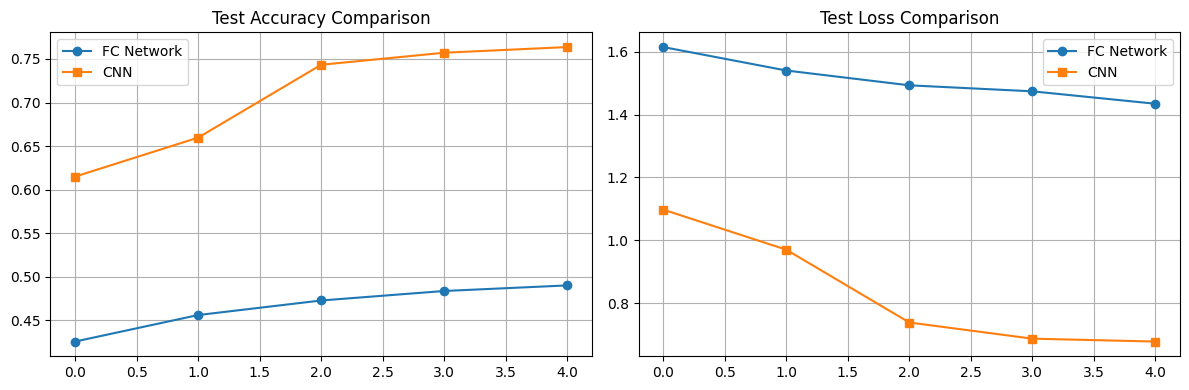

In [1]:
import torch
from datasets import get_cifar_loaders
from models import CIFARCNN, CNNWithResidual,FullyConnectedModel
from trainer import train_model
from utils import plot_training_history, count_parameters, compare_models, print_confusion_matrix 
import time
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#одинавковые гиперпараметры для всех моеделей
batch_size = 64
epochs = 5
lr = 0.001
num_classes = 10

#конфиг для полносвязная сети
config = {
    "input_size": 32 * 32 * 3,
    "num_classes": num_classes,
    "layers": [
        {"type": "linear", "size": 256},
        {"type": "relu"},
        {"type": "dropout", "rate": 0.25},
        {"type": "linear", "size": 128},
        {"type": "relu"},
        {"type": "dropout", "rate": 0.25},
    ]
}


train_loader, test_loader = get_cifar_loaders(batch_size=batch_size)

print('Обучение полносвязной сети для CIFAR')
fc_res = []
fc_model = FullyConnectedModel(**config).to(device)
#замер времени обучения
start = time.time()
fc_history = train_model(fc_model, train_loader, test_loader, epochs=epochs, lr=lr, device=device,is_grad_flow=1)
end = time.time()
fc_res.append(end-start)
#замер времени инференса
start = time.time()
for data, labels in test_loader:
    i = fc_model(data.to(device))
end = time.time()
fc_res.append(end-start)
fc_res.append(count_parameters(fc_model))
#сохранение графика
plot_path = f"plots/cifar_fc_model_training.png"
plot_training_history(fc_history, save_path=plot_path)
#confusion matrix
print_confusion_matrix(fc_model, test_loader, device, title="Confusion Matrix FC Model")


print('Обучение простой CNN для CIFAR')
cnn_res = []
simple_cnn = CIFARCNN(num_classes=num_classes).to(device)
#замер времени обучения
start = time.time()
cnn_history = train_model(simple_cnn, train_loader, test_loader, epochs=epochs, lr=lr, device=device,is_grad_flow=1)
end = time.time()
cnn_res.append(end-start)
#замер времени инференса
start = time.time()
for data, labels in test_loader:
    i = simple_cnn(data.to(device))
end = time.time()
cnn_res.append(end-start)
cnn_res.append(count_parameters(simple_cnn))
#сохранение графика
plot_path_cnn = f"plots/cifar_simple_cnn_training.png"
plot_training_history(cnn_history, save_path=plot_path_cnn)
#confusion matrix
print_confusion_matrix(simple_cnn, test_loader, device, title="Confusion Matrix Simple CNN")


print('Обучение CNN с Residual Block для CIFAR')
cnn_with_res_result = []
cnn_with_res = CNNWithResidual(input_channels=3, num_classes=num_classes).to(device)
#замер времени обучения
start = time.time()
cnn_with_res_history = train_model(cnn_with_res, train_loader, test_loader, epochs=epochs, lr=lr, device=device,is_grad_flow=1)
end = time.time()
cnn_with_res_result.append(end-start)
#замер времени инференса
start = time.time()
for data, labels in test_loader:
    i = cnn_with_res(data.to(device))
end = time.time()
cnn_with_res_result.append(end-start)
cnn_with_res_result.append(count_parameters(cnn_with_res))
#сохранение графика
plot_path_cnn_with_res = f"plots/cifar_cnn_with_res_training.png"
plot_training_history(cnn_with_res_history, save_path=plot_path_cnn_with_res)
#confusion matrix
print_confusion_matrix(cnn_with_res, test_loader, device, title="Confusion Matrix CNN with Residual")


#вывод времени, и колво параметров
print('Полносвязная сеть CIFAR')
print(f"Время обучения - {fc_res[0]} секунд")
print(f"Время инференса - {fc_res[1]} секунд")
print(f"Количество параметров - {fc_res[2]}")

print('Простая CNN CIFAR')
print(f"Время обучения - {cnn_res[0]} секунд")
print(f"Время инференса - {cnn_res[1]} секунд")
print(f"Количество параметров - {cnn_res[2]}")

print('CNN с Residual Block CIFAR')
print(f"Время обучения - {cnn_with_res_result[0]} секунд")
print(f"Время инференса - {cnn_with_res_result[1]} секунд")
print(f"Количество параметров - {cnn_with_res_result[2]}")


#сохранение графиков сравнения
pth1 = f"plots/cifar_compare_fc_anc_simple_cnn.png"
compare_models(fc_history, cnn_history,pth1)
pth2 = f"plots/cifar_compare_fc_anc_cnn_with_res.png"
compare_models(fc_history, cnn_with_res_history,pth2)